# 1. Import libra and load raw data

In [46]:
PATH_TO_PROJECT = '/home/thuy/Desktop/ML_project'
import sys
sys.path.append(PATH_TO_PROJECT)
import pandas as pd
import numpy as np 
from library import preprocessing as pre
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime
%matplotlib inline

In [47]:
def load_data():
    df = pd.read_csv(PATH_TO_PROJECT+'/data/raw_data/raw_data.csv', encoding='utf-8')
    return df
df = load_data()
print(f'>>shape: {df.shape}')
df.head(2)

>>shape: (2703, 20)


,Unnamed: 0,name,number,league,age,height,position,erfolge,caps,goalsCap,urlInsta,follower,foot,agent,club,outfitter,contractExpires,score,country,price
0,0,Habib Keïta,19.0,Ligue 1,19,1.82,midfield,0,0,0,http://www.instagram.com/habib.keita_12/,6063.0,left,BLACKSKILL,Olympique Lyon,NaN,2025-06-30,8/1/0/413/413/,Mali,0.5
1,1,Rogério,6.0,Serie A,23,1.78,Defender,0,0,0,http://www.instagram.com/roogerio98/,249000.0,left,Prattes Group,US Sassuolo,NaN,2024-06-30,12/0/1/0/1.021/,Brazil,6.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2703 non-null   int64  
 1   name             2703 non-null   object 
 2   number           2653 non-null   float64
 3   league           2691 non-null   object 
 4   age              2703 non-null   int64  
 5   height           2694 non-null   float64
 6   position         2703 non-null   object 
 7   erfolge          2703 non-null   int64  
 8   caps             2703 non-null   int64  
 9   goalsCap         2703 non-null   int64  
 10  urlInsta         2223 non-null   object 
 11  follower         2101 non-null   float64
 12  foot             2656 non-null   object 
 13  agent            2275 non-null   object 
 14  club             2703 non-null   object 
 15  outfitter        974 non-null    object 
 16  contractExpires  2623 non-null   object 
 17  score         

In [49]:
df.describe()

,Unnamed: 0,number,age,height,erfolge,caps,goalsCap,follower,price
count,2703.000000,2653.000000,2703.000000,2694.000000,2703.000000,2703.000000,2703.000000,2.101000e+03,2687.000000
mean,1351.000000,18.791934,25.873104,1.828448,2.237884,14.712542,2.069922,1.421069e+06,9.962825
std,780.433213,15.499150,4.599725,0.066630,3.712266,23.854339,6.508600,1.167559e+07,15.035563
min,0.000000,1.000000,16.000000,1.630000,0.000000,0.000000,0.000000,4.000000e+00,0.010000
25%,675.500000,8.000000,22.000000,1.780000,0.000000,1.000000,0.000000,2.017900e+04,1.500000
50%,1351.000000,17.000000,26.000000,1.830000,1.000000,5.000000,0.000000,6.669200e+04,4.000000
75%,2026.500000,25.000000,29.000000,1.880000,3.000000,18.000000,1.000000,3.802740e+05,12.000000
max,2702.000000,99.000000,40.000000,2.040000,62.000000,184.000000,115.000000,3.742918e+08,160.000000


# 2. Preprocessing data

## Missing data

<AxesSubplot:>

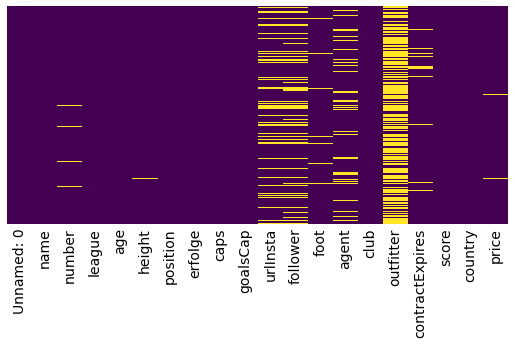

In [50]:
plt.figure(figsize= (8, 4))
plt.style.use('fivethirtyeight')
sns.heatmap(df.isna(),  yticklabels= False, cbar= False, cmap= 'viridis' )

In [51]:
df.isna().sum()

Unnamed: 0            0
name                  0
number               50
league               12
age                   0
height                9
position              0
erfolge               0
caps                  0
goalsCap              0
urlInsta            480
follower            602
foot                 47
agent               428
club                  0
outfitter          1729
contractExpires      80
score                 2
country               0
price                16
dtype: int64

In [52]:
#1% cua so luong ban ghi
df.shape[0]/100

27.03

In [53]:
#score - price - league - club

In [54]:
miss_process = pre.process_missing(df)
miss_process.dropna(columns_name=['score', 'price', 'league', 'club'])

In [55]:
#foot

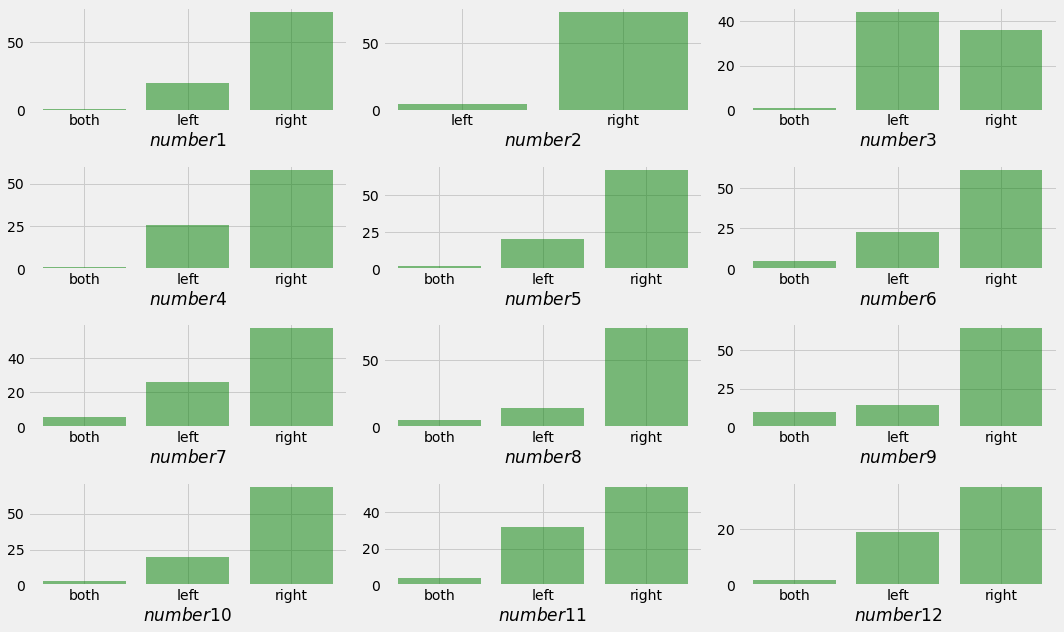

In [56]:
fig, ax= plt.subplots(4, 3, figsize = (15, 9))
sp4foot_pos= pd.DataFrame(df.groupby(['number', 'foot']).count().iloc[:,0]).reset_index()
for i in range(1, 13):
    if i in [1, 2, 3]:
        k = 0
        l = 1
    elif i in [4, 5, 6]:
        k =1
        l =4
    elif i in [7, 8, 9]:
        k =2
        l=7
    elif i in [10, 11, 12]:
        k =3
        l=10
    # elif i in [13, 14, 15]:
    #     k=4
    #     l=13
    # elif i in [16, 17, 18]:
    #     k=5
    #     l=16
    ala = sp4foot_pos[sp4foot_pos.number == i]
    
    ax[k][i-l].bar(ala['foot'], ala['Unnamed: 0'], color = 'green', alpha = 0.5)
    fig.tight_layout()
    ax[k][i-l].set_xlabel('$number {}$'.format(i), size=17)
    

In [57]:
df[(df.foot.isna()) & (df.number.isna())]

,Unnamed: 0,name,number,league,age,height,position,erfolge,caps,goalsCap,urlInsta,follower,foot,agent,club,outfitter,contractExpires,score,country,price


In [58]:

foot_by_number = {3.0: 'left', 11.0: 'left', 7.0 : 'left'}

In [59]:
miss_process._foot(fill_map=foot_by_number)

In [60]:
#height

In [61]:
mean_hei = df.groupby('position').agg({'height':np.mean})
_dct_mean_hei = {}
for _index, _values in zip(mean_hei.index, mean_hei.values):
    _dct_mean_hei[_index] = _values[0]
_dct_mean_hei

{'Defender': 1.838782122905028,
 'Goalkeeper': 1.900974025974026,
 'attack': 1.810028328611898,
 'midfield': 1.8052299605781865}

In [62]:
df[(df.height.isna()) & (df.position.isna())]

,Unnamed: 0,name,number,league,age,height,position,erfolge,caps,goalsCap,urlInsta,follower,foot,agent,club,outfitter,contractExpires,score,country,price


In [63]:
miss_process._height(fill_map='auto')

In [64]:
# contractExpires 

In [65]:
miss_process.contractExpires()

In [66]:
#follower

In [67]:
mean_folow_club = df.groupby(['club']).agg({'follower': np.median}).fillna(5000)
_dct_mean_fol = {}
for _index, _values in zip(mean_folow_club.index, mean_folow_club.values):
    _dct_mean_fol[_index] = _values[0]
_dct_mean_fol

{'1. FC Köln': 30274.0,
 '1.FC Köln II': 5000.0,
 '1.FC Köln U19': 5000.0,
 '1.FC Union Berlin': 25553.5,
 '1.FSV Mainz 05': 14682.0,
 'AC Milan': 739511.0,
 'ACF Fiorentina': 110548.5,
 'AS Monaco': 79180.0,
 'AS Roma': 234721.5,
 'AS Saint-Étienne': 20637.0,
 'Arminia Bielefeld': 13629.0,
 'Arsenal FC': 925942.0,
 'Arsenal FC U23': 5000.0,
 'Aston Villa': 144826.0,
 'Atalanta BC': 200352.5,
 'Athletic Bilbao': 37752.0,
 'Atlético de Madrid': 938357.0,
 'Bayer 04 Leverkusen': 147390.0,
 'Bayer 04 Leverkusen U19': 19850.0,
 'Bayern Munich': 957367.0,
 'Bilbao Athletic': 5000.0,
 'Bologna FC 1909': 28660.0,
 'Borussia Dortmund': 473597.0,
 'Borussia Dortmund II': 5000.0,
 'Borussia Mönchengladbach': 71552.0,
 'Brentford FC': 20131.5,
 'Brighton & Hove Albion': 65861.5,
 'Burnley FC': 29742.0,
 'CA Osasuna': 18694.0,
 'Cagliari Calcio': 40283.0,
 'Celta Vigo B': 5000.0,
 'Celta de Vigo': 63186.5,
 'Chelsea FC': 1717499.5,
 'Clermont Foot 63': 17870.5,
 'Crystal Palace': 101986.0,
 'Cádiz

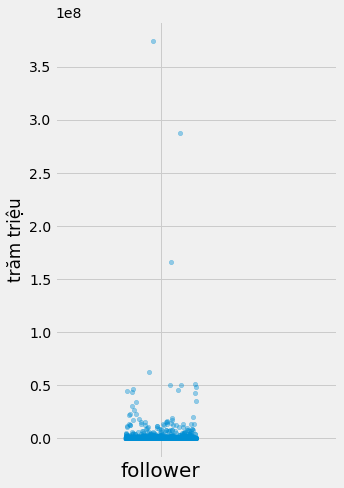

In [68]:
plt.figure(figsize=(5, 7))
plt.scatter(np.random.random_sample(df.shape[0]), df.follower, s=20, alpha=0.4)
plt.xticks([-1, 3])
plt.ylabel('trăm triệu', rotation = 90)
plt.xticks([0.5], ['follower'], size=20)
plt.tight_layout()

In [69]:
miss_process._follower(fill_map='auto')

In [70]:
# xoa cot du lieu khong can thiet hoac bi thieu qua nhieu

In [71]:
pre.delete_columns(df).isna().sum()

>>Successfully. Deleted columns: ['number', 'urlInsta', 'agent', 'outfitter', 'Unnamed: 0', 'foot']


name               0
league             0
age                0
height             0
position           0
erfolge            0
caps               0
goalsCap           0
follower           0
club               0
contractExpires    0
score              0
country            0
price              0
dtype: int64

<AxesSubplot:>

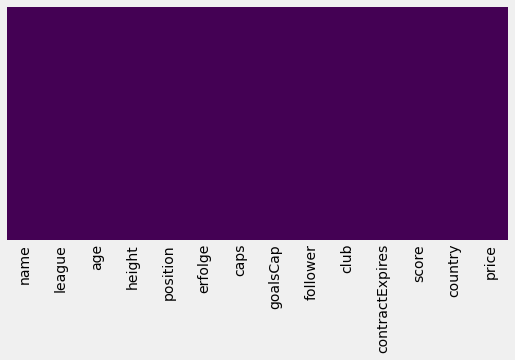

In [72]:
plt.figure(figsize= (8, 4))
plt.style.use('fivethirtyeight')
sns.heatmap(df.isna(),  yticklabels= False, cbar= False, cmap= 'viridis' )

In [73]:
df.isna().sum()

name               0
league             0
age                0
height             0
position           0
erfolge            0
caps               0
goalsCap           0
follower           0
club               0
contractExpires    0
score              0
country            0
price              0
dtype: int64

In [74]:
df.head(2)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractExpires,score,country,price
0,Habib Keïta,Ligue 1,19,1.82,midfield,0,0,0,6063.0,Olympique Lyon,2025-06-30,8/1/0/413/413/,Mali,0.5
1,Rogério,Serie A,23,1.78,Defender,0,0,0,249000.0,US Sassuolo,2024-06-30,12/0/1/0/1.021/,Brazil,6.0


## Convert to numeric datatype

In [75]:
df.dtypes

name                object
league              object
age                  int64
height             float64
position            object
erfolge              int64
caps                 int64
goalsCap             int64
follower           float64
club                object
contractExpires     object
score               object
country             object
price              float64
dtype: object

In [76]:
cvt = pre.convert_to_nummeric(df)

In [77]:
cvt.club()
cvt.contract_year()
cvt.country()
cvt.league()
cvt.position()

In [78]:
df_ct, df_gk = cvt.score(df)

In [79]:
print(f'gk shape: {df_gk.shape}')
print(f'ct shape: {df_ct.shape}')

gk shape: (308, 17)
ct shape: (2368, 17)


In [80]:
df_ct.head(2)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,price,appearances,goals,assists,minuted
0,Habib Keïta,4.0,19,1.82,2,0,0,0,6063.0,1.0,3.539726,3.0,0.5,8.0,1.0,0.0,413.000
1,Rogério,2.0,23,1.78,1,0,0,0,249000.0,1.0,2.539726,2.0,6.0,12.0,0.0,1.0,1.021


In [81]:
df_gk.head(2)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,price,appearances,nilnil_games,goals_conceded,minuted
2,Steve Mandanda,4.0,36,1.85,0,8,34,0,634401.0,1.0,2.539726,1.0,2.0,4.0,1.0,5.0,360.00
5,Unai Simón,1.0,24,1.90,0,3,20,0,3800.0,1.0,3.539726,1.0,20.0,14.0,6.0,10.0,1.26


In [82]:
df_ct.describe()

,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,price,appearances,goals,assists,minuted
count,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2.368000e+03,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000
mean,2.046030,25.714105,1.819362,1.921030,2.273649,15.240709,2.326014,1.223010e+06,0.850929,2.000718,1.332348,10.679761,18.868243,2.066301,1.476351,315.606806
std,1.429661,4.385108,0.063074,0.819655,3.802734,23.799834,6.823823,1.098725e+07,0.356234,1.276470,0.815317,15.494484,42.267315,6.800761,3.796618,328.761492
min,0.000000,16.000000,1.630000,1.000000,0.000000,0.000000,0.000000,9.000000e+00,0.000000,0.126027,0.000000,0.075000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,1.780000,1.000000,0.000000,1.000000,0.000000,1.958100e+04,1.000000,0.536986,1.000000,1.800000,8.000000,0.000000,0.000000,1.420750
50%,2.000000,25.000000,1.820000,2.000000,1.000000,5.000000,0.000000,4.806150e+04,1.000000,1.536986,1.000000,5.000000,13.000000,1.000000,1.000000,215.500000
75%,3.000000,29.000000,1.860000,3.000000,3.000000,19.000000,2.000000,2.653692e+05,1.000000,2.539726,2.000000,13.000000,16.000000,2.000000,2.000000,598.000000
max,5.000000,40.000000,2.010000,3.000000,62.000000,184.000000,115.000000,3.742918e+08,1.000000,9.542466,3.000000,160.000000,516.000000,144.000000,78.000000,999.000000


In [83]:
df_gk.describe()

,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,price,appearances,nilnil_games,goals_conceded,minuted
count,308.000000,308.000000,308.000000,308.0,308.000000,308.000000,308.0,3.080000e+02,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,2.129870,27.665584,1.900974,0.0,2.068182,11.123377,0.0,4.543724e+05,0.840909,1.708424,1.097403,4.786640,19.321429,5.704545,24.970779,162.128987
std,1.460451,5.449369,0.042315,0.0,2.952153,23.630938,0.0,1.674074e+06,0.366356,1.191802,0.606904,9.636501,63.537088,19.682340,80.193957,262.567700
min,0.000000,18.000000,1.780000,0.0,0.000000,0.000000,0.0,4.000000e+00,0.000000,-0.463014,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,1.870000,0.0,0.000000,0.000000,0.0,1.436575e+04,1.000000,0.536986,1.000000,0.300000,1.000000,0.000000,0.000000,1.153000
50%,2.000000,28.000000,1.900000,0.0,1.000000,1.000000,0.0,3.716150e+04,1.000000,1.536986,1.000000,1.000000,6.000000,1.000000,8.000000,1.800000
75%,3.000000,32.000000,1.930000,0.0,3.000000,8.000000,0.0,1.392990e+05,1.000000,2.539726,1.000000,5.000000,15.250000,4.000000,20.000000,270.000000
max,5.000000,40.000000,2.040000,0.0,20.000000,139.000000,0.0,1.349487e+07,1.000000,5.539726,3.000000,70.000000,514.000000,152.000000,677.000000,990.000000


## Noise

In [84]:
def img4noise(df, column_name):
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax[0].hist(df[column_name], edgecolor= 'white', color = 'g')
    ax[0].set_title('histogram of attrs {}'.format(column_name))
    ax[1].boxplot(df[column_name])
    ax[1].set_title('boxplot of attrs {}'.format(column_name))
    ax[1].set_xticks([1], [column_name])
    plt.show()

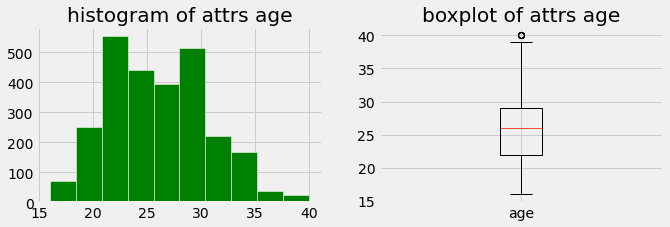

In [85]:
img4noise(df, 'age')

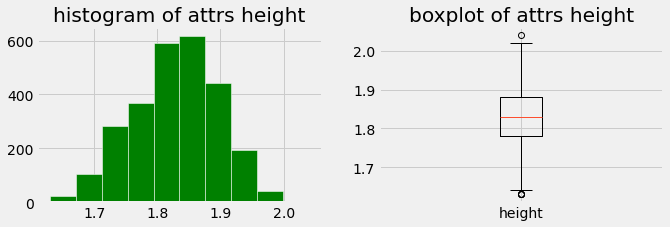

In [86]:
img4noise(df, 'height')

In [87]:
#erfolge #GLM 

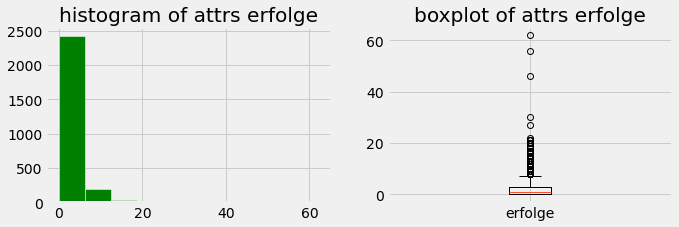

In [88]:
img4noise(df, 'erfolge')

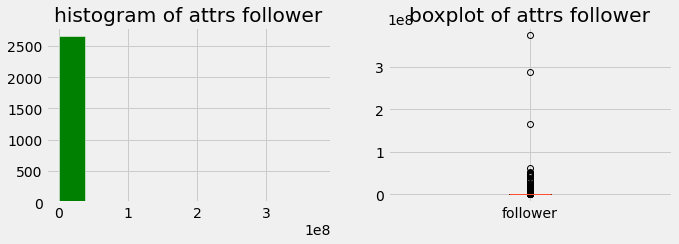

In [89]:
img4noise(df, 'follower')

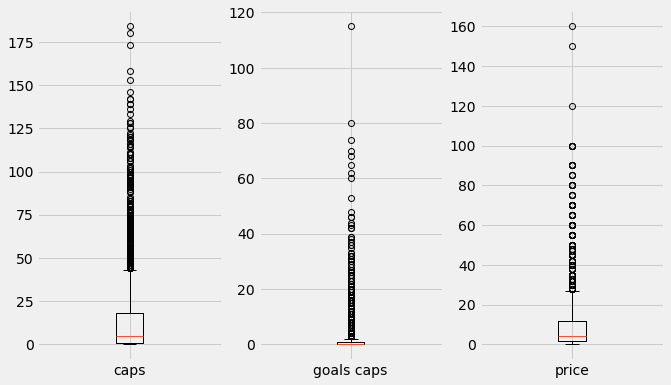

In [90]:
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].boxplot(df.caps)
ax[0].set_xticks([1], ['caps'])
ax[1].boxplot(df.goalsCap)
ax[1].set_xticks([1], ['goals caps'])
ax[2].boxplot(df.price)
ax[2].set_xticks([1], ['price'])

In [91]:
#contract year

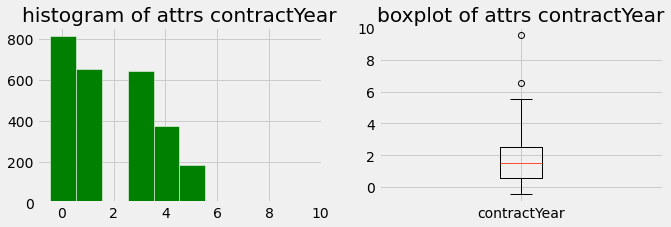

In [92]:
img4noise(df, 'contractYear')

In [93]:
df_ct.head(0)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,price,appearances,goals,assists,minuted


In [94]:
df_gk.head(0)

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,price,appearances,nilnil_games,goals_conceded,minuted


In [95]:
df_ct_final = df_ct[['name', 'league', 'age', 'height', 'position', 'erfolge', 'caps',
 'goalsCap', 'follower', 'club', 'contractYear', 'country', 'appearances', 'goals',
 'assists', 'minuted', 'price']].copy()

In [96]:
df_gk_final = df_gk[['name', 'league', 'age', 'height', 'position', 'erfolge', 'caps',
 'goalsCap', 'follower', 'club', 'contractYear', 'country', 'appearances', 'nilnil_games',
 'goals_conceded', 'minuted', 'price']].copy()

In [97]:
df_gk_final['league'] = df_gk_final['league'].astype(int)
df_gk_final['position'] = df_gk_final['position'].astype(int)
df_gk_final['country'] = df_gk_final['country'].astype(int)
df_gk_final['club'] = df_gk_final['club'].astype(int)

In [98]:
df_ct_final['league'] = df_ct_final['league'].astype(int)
df_ct_final['position'] = df_ct_final['position'].astype(int)
df_ct_final['country'] = df_ct_final['country'].astype(int)
df_ct_final['club'] = df_ct_final['club'].astype(int)

In [54]:
df_gk_final.head()  

,name,league,age,height,position,erfolge,caps,goalsCap,follower,club,contractYear,country,appearances,nilnil_games,goals_conceded,minuted,price
2,Steve Mandanda,4,36,1.85,0,8,34,0,634401.0,1,2.539726,1,4.0,1.0,5.0,360.00,2.00
5,Unai Simón,1,24,1.90,0,3,20,0,3800.0,1,3.539726,1,14.0,6.0,10.0,1.26,20.00
16,Matz Sels,4,29,1.88,0,2,1,0,28585.0,1,2.539726,1,17.0,4.0,22.0,1.53,6.50
45,Alessandro Berardi,2,30,1.85,0,1,0,0,5432.0,1,1.536986,1,0.0,0.0,0.0,0.00,0.05
52,Niklas Lomb,3,28,1.86,0,0,0,0,147390.0,1,0.536986,1,0.0,0.0,0.0,0.00,0.25


In [55]:
df_ct_final.to_csv(
    PATH_TO_PROJECT+'/data/raw_data/ct_data.csv',
    encoding='utf-8',
    index=False
  )

In [56]:
df_gk_final.to_csv(
    PATH_TO_PROJECT+'/data/raw_data/gk_data.csv',
    encoding='utf-8',
    index=False
  )